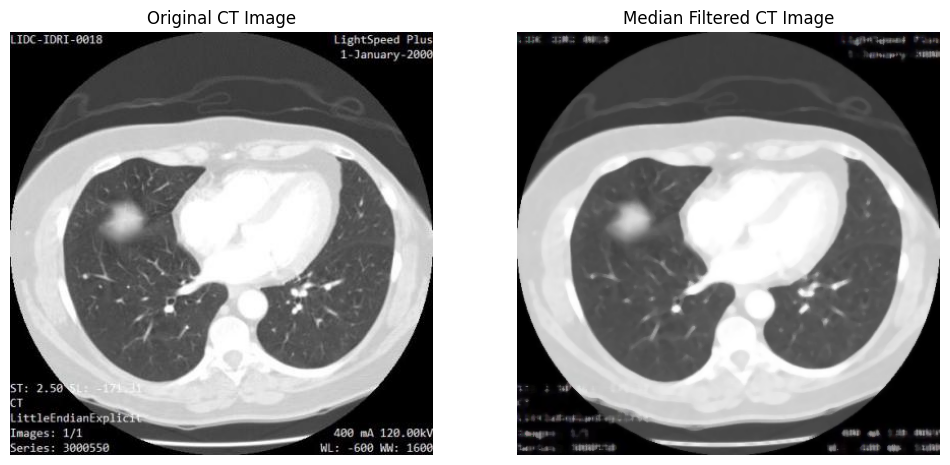

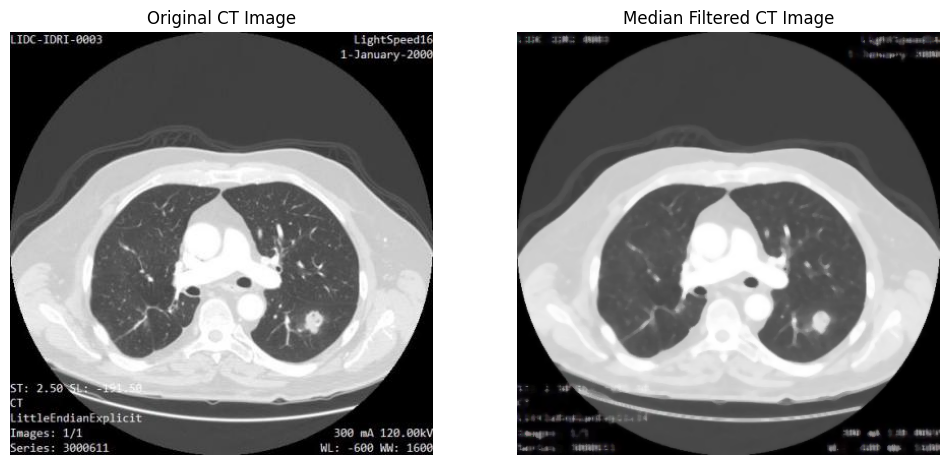

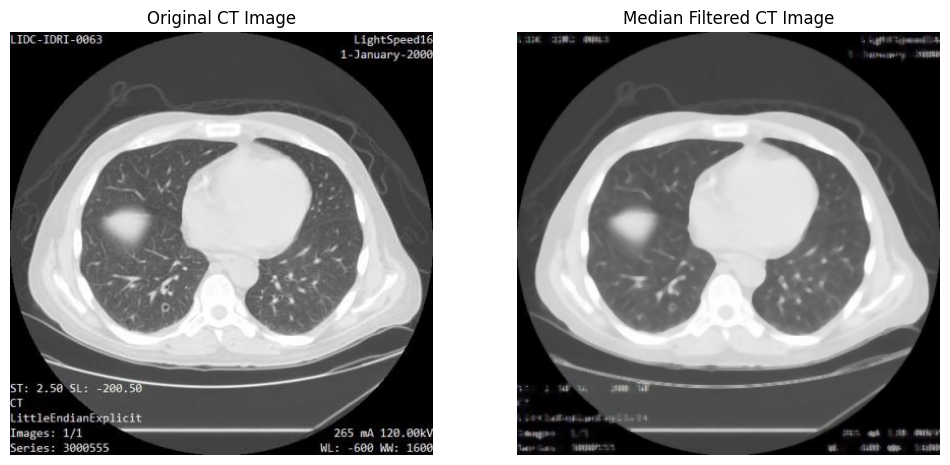

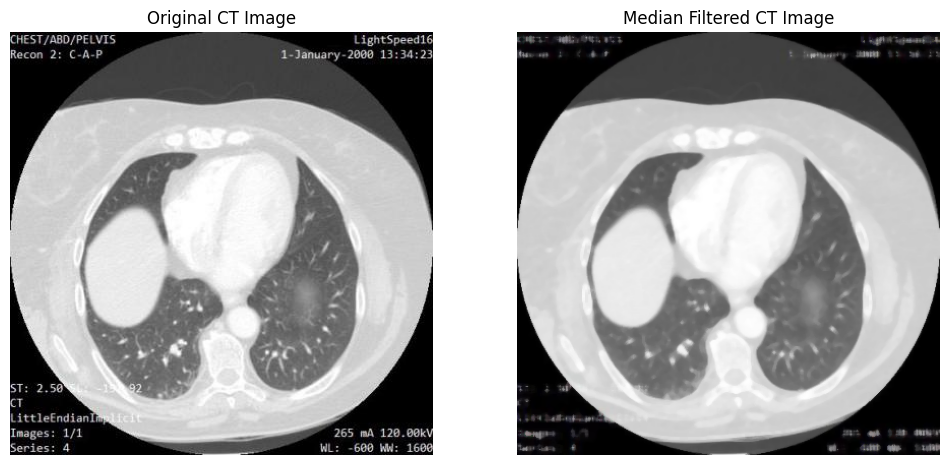

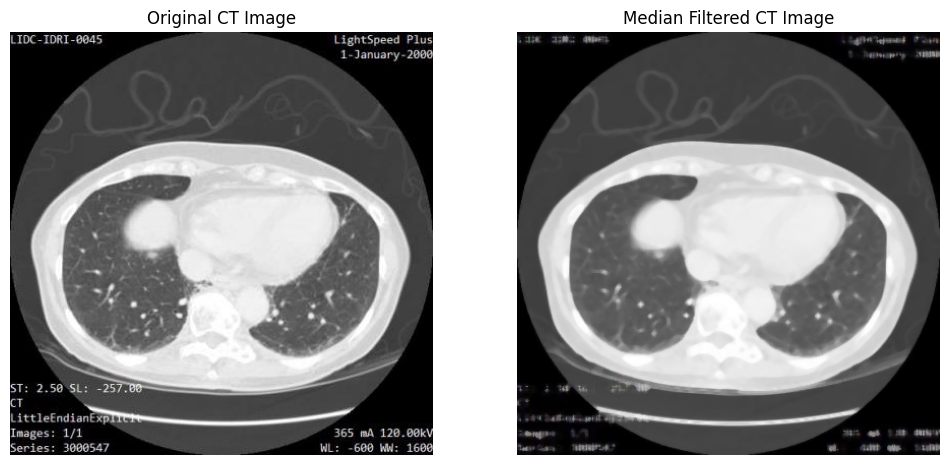

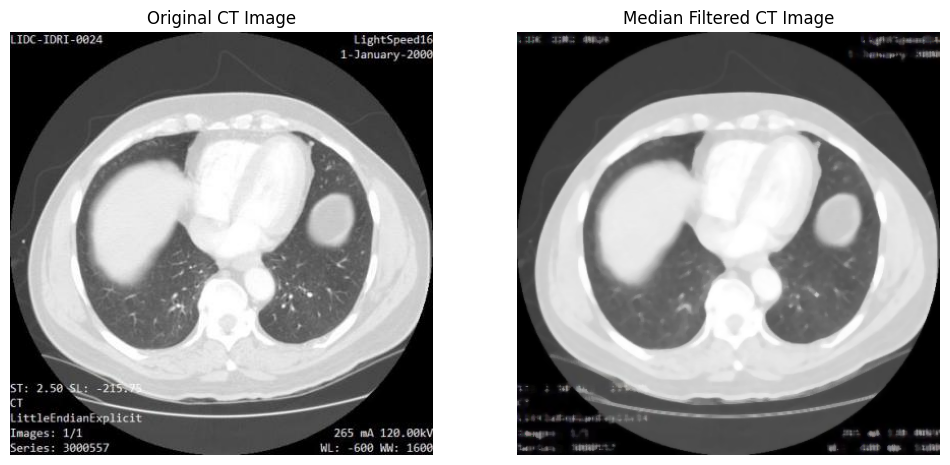

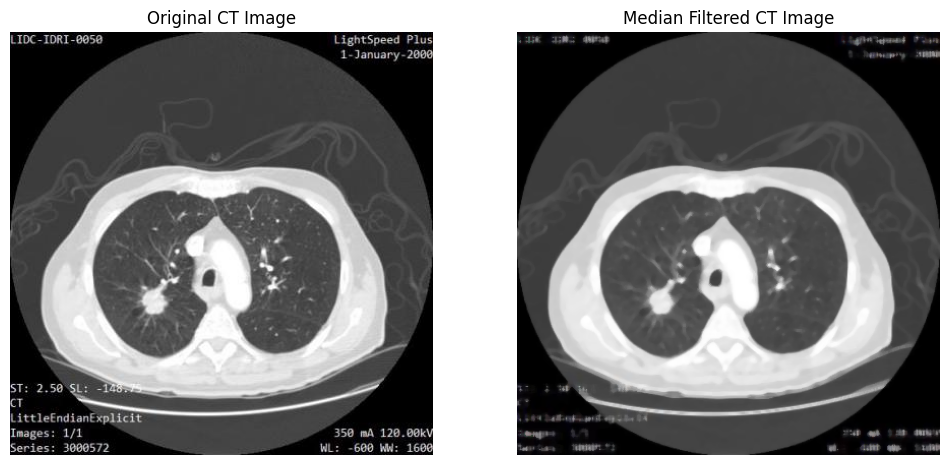

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

image_directory = '/content/CT Image'

if os.path.exists(image_directory) and os.path.isdir(image_directory):
    image_files = [os.path.join(image_directory, file) for file in os.listdir(image_directory)]

    for image_path in image_files:
        ct_image = cv2.imread(image_path)
        if ct_image is not None:
            # The median filter
            median_filtered_image = cv2.medianBlur(ct_image, ksize=5)

            plt.figure(figsize=(12, 6))
            plt.subplot(121)
            plt.imshow(cv2.cvtColor(ct_image, cv2.COLOR_BGR2RGB))
            plt.title('Original CT Image')
            plt.axis('off')

            plt.subplot(122)
            plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
            plt.title('Median Filtered CT Image')
            plt.axis('off')

            plt.show()

            cv2.imwrite(output_path, median_filtered_image)
else:
    print(f"Error: Image directory not found. Please check the directory path.")


Processing image: /content/CT Image/enhanced_images
Error: Unable to load the image at /content/CT Image/enhanced_images
Processing image: /content/CT Image/23_jpg.rf.2cf994e19d17299c80a280bf8ea87315.jpg


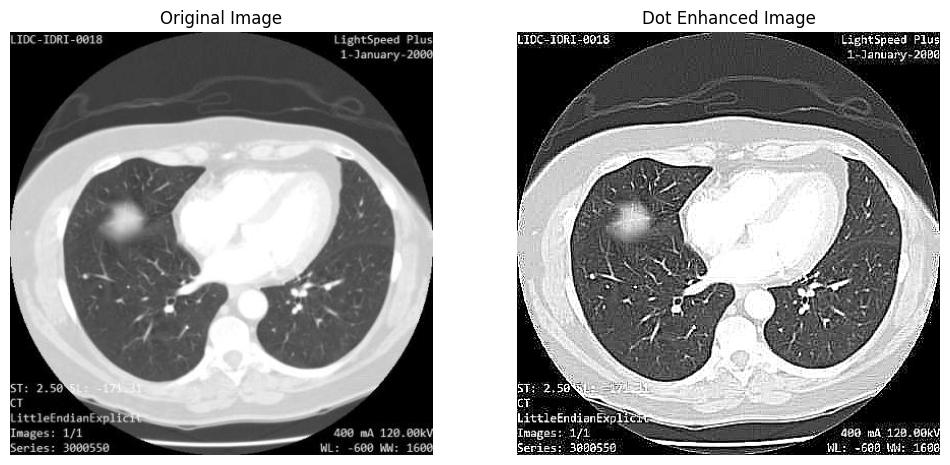

Processing image: /content/CT Image/4_jpg.rf.e6fdccf8963d26789efd99709b1e5f43.jpg


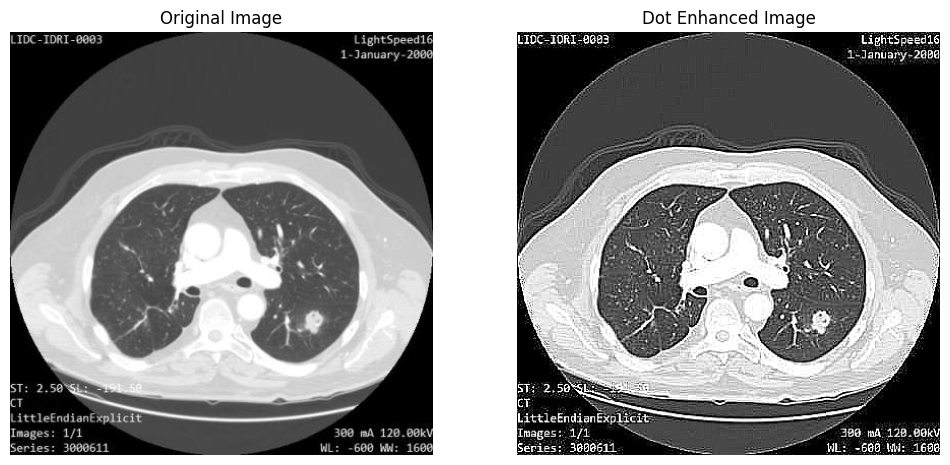

Processing image: /content/CT Image/121_jpg.rf.b113f84b32ab7f10ac6e1d60383626f2.jpg


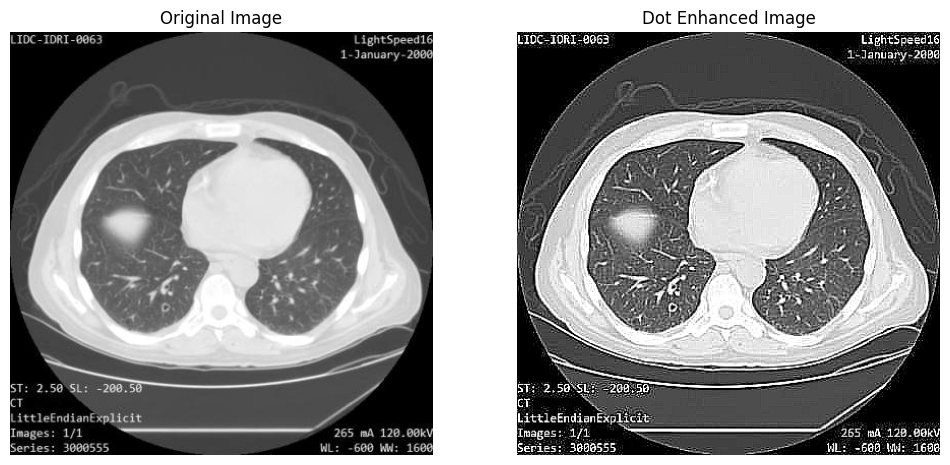

Processing image: /content/CT Image/258_jpg.rf.48c118fc23b1827456c76e5601e528ae.jpg


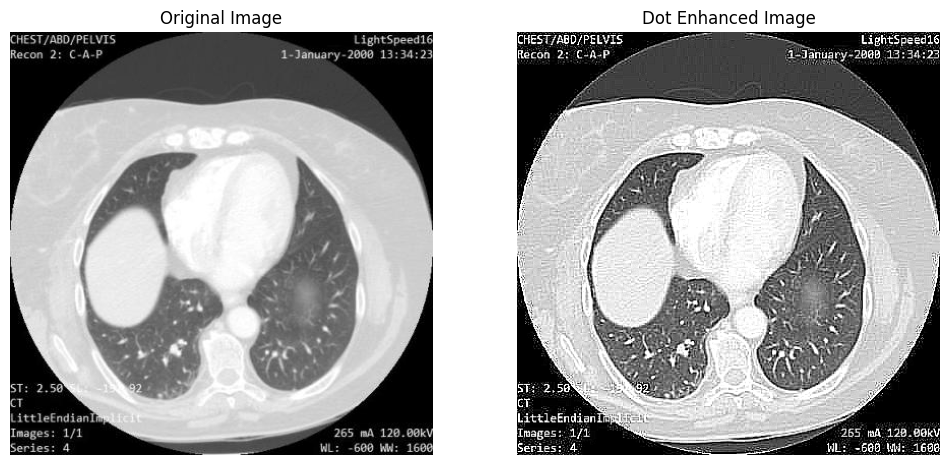

Processing image: /content/CT Image/.ipynb_checkpoints
Error: Unable to load the image at /content/CT Image/.ipynb_checkpoints
Processing image: /content/CT Image/75_jpg.rf.862ec82f19ce21940e53303be3311f36.jpg


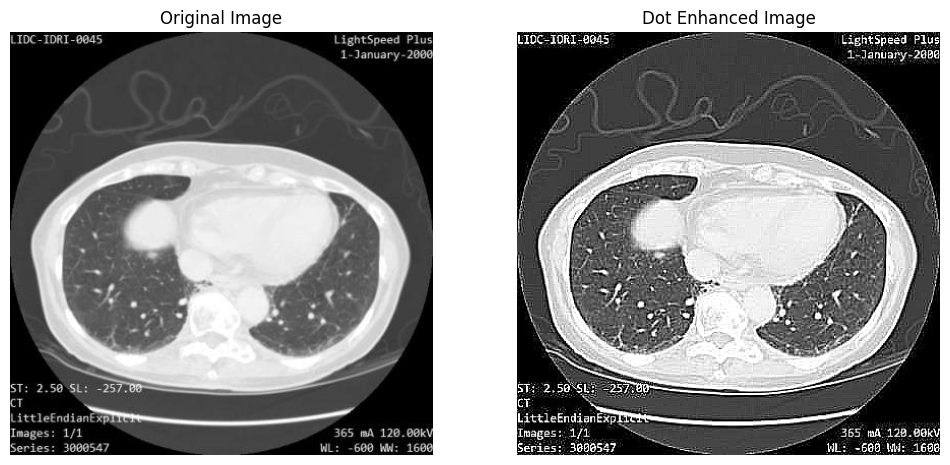

Processing image: /content/CT Image/31_jpg.rf.103edcd7f66c8c3e2996ab800dbeca36.jpg


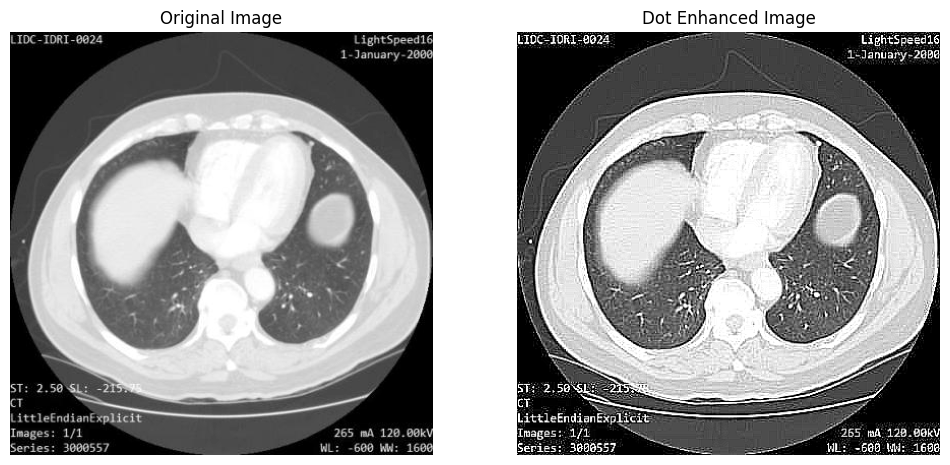

Processing image: /content/CT Image/93_jpg.rf.b48b4f7cc07a72b7217d80f5ca197726.jpg


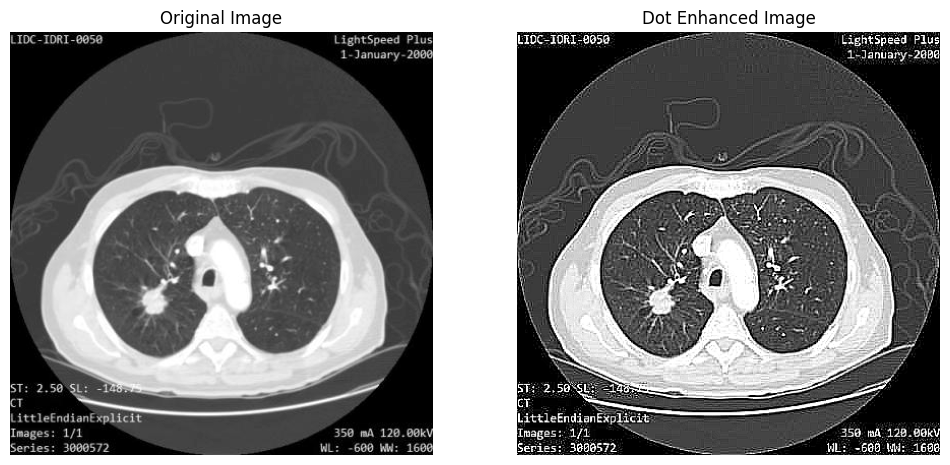

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/CT Image'

if os.path.exists(image_directory) and os.path.isdir(image_directory):
    image_files = [os.path.join(image_directory, file) for file in os.listdir(image_directory)]

    # The dot enhancement kernel
    dot_enhancement_kernel = np.array([
        [-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]
    ])

    enhanced_directory = os.path.join(image_directory, 'enhanced_images')
    os.makedirs(enhanced_directory, exist_ok=True)

    for image_path in image_files:
        print(f"Processing image: {image_path}")

        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if original_image is not None:
            # Apply the dot enhancement filter
            enhanced_image = cv2.filter2D(original_image, -1, dot_enhancement_kernel)

            # filename = os.path.basename(image_path)
            # enhanced_image_path = os.path.join(enhanced_directory, f'dot_enhanced_{filename}')
            cv2.imwrite(enhanced_image_path, enhanced_image)

            plt.figure(figsize=(12, 6))
            plt.subplot(121)
            plt.imshow(original_image, cmap='gray')
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(122)
            plt.imshow(enhanced_image, cmap='gray')
            plt.title('Dot Enhanced Image')
            plt.axis('off')

            plt.show()
        else:
            print(f"Error: Unable to load the image at {image_path}")

else:
    print(f"Error: Image directory not found. Please check the directory path.")


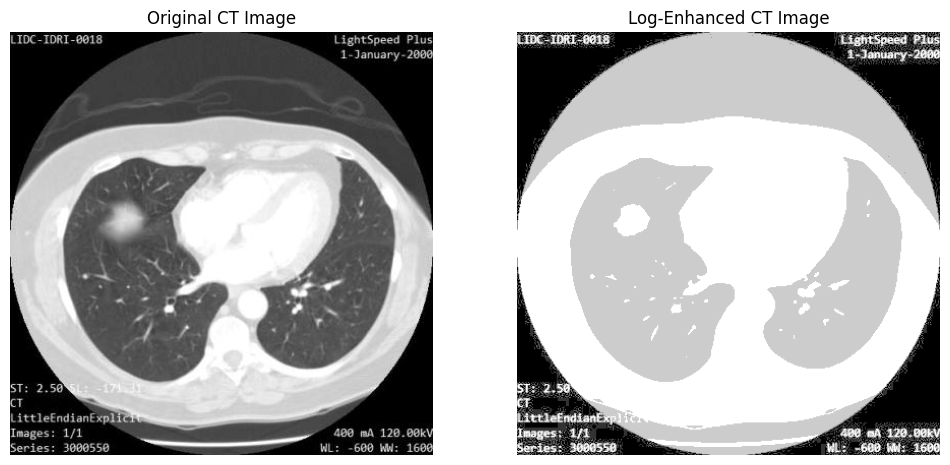

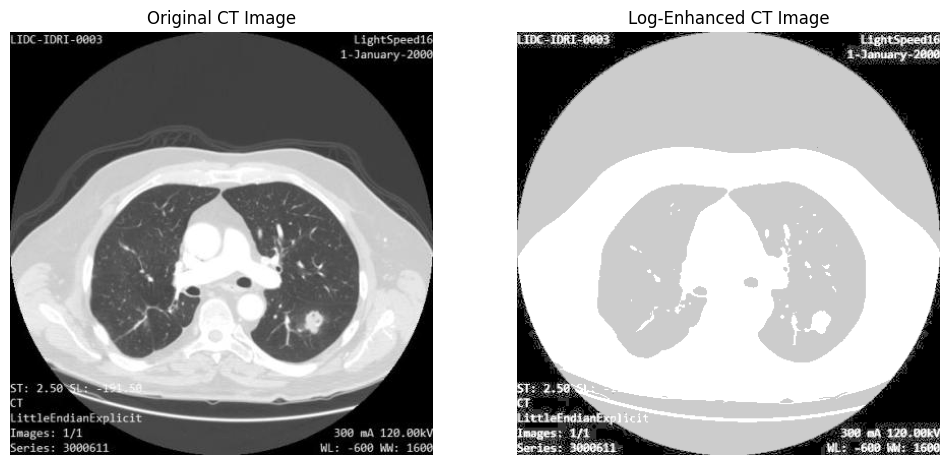

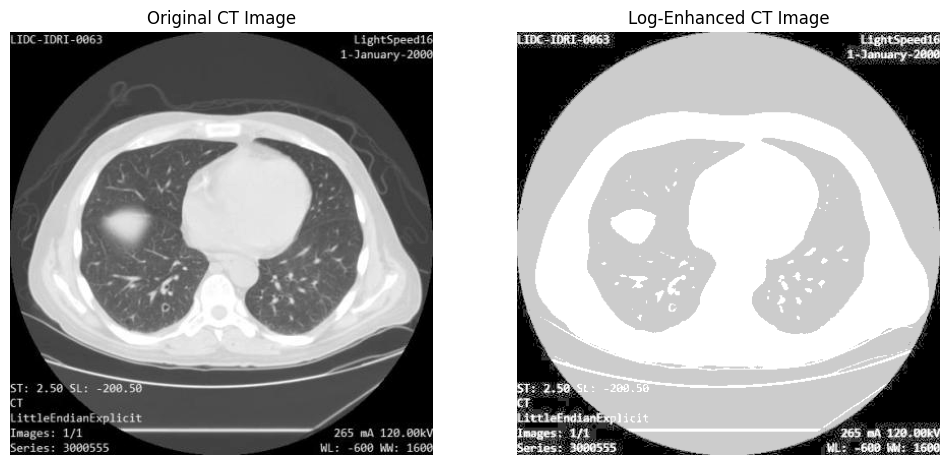

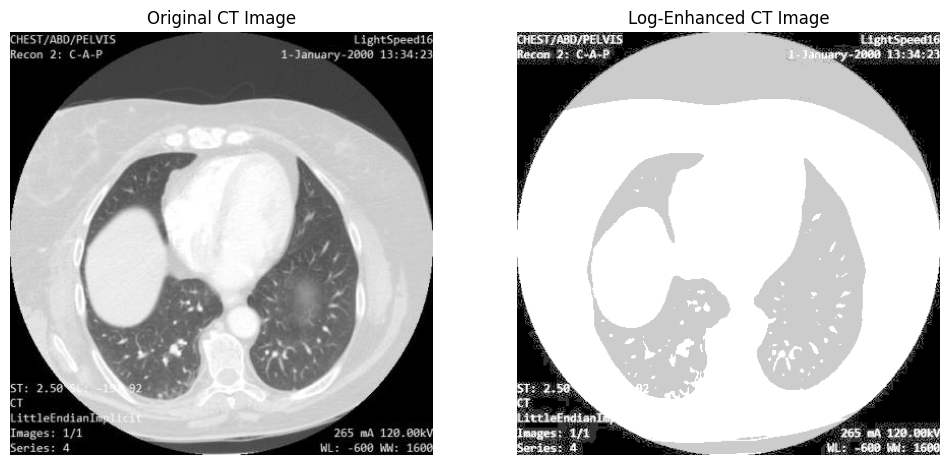

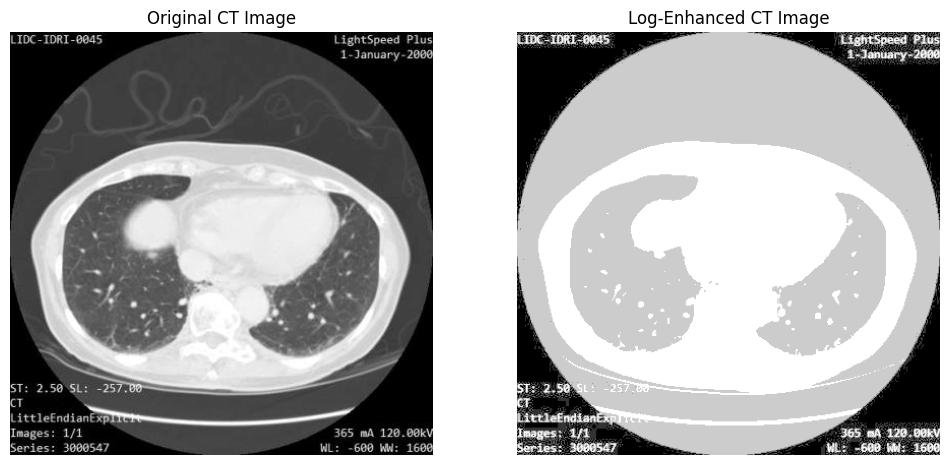

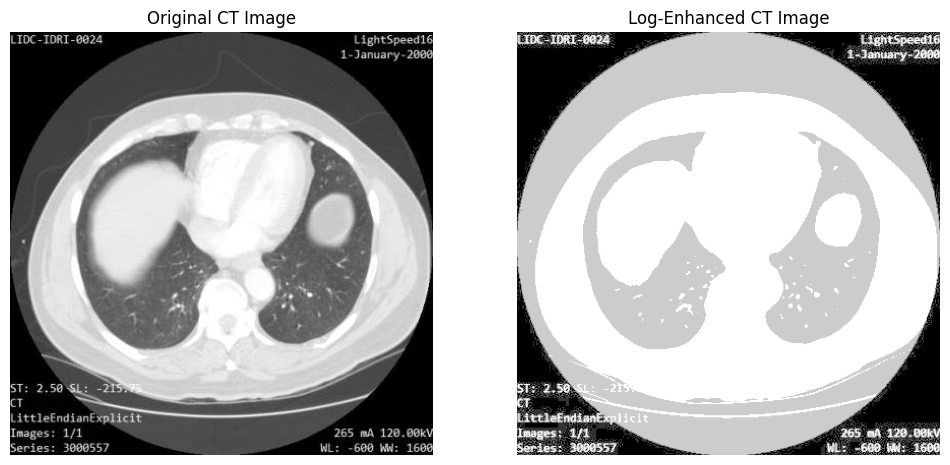

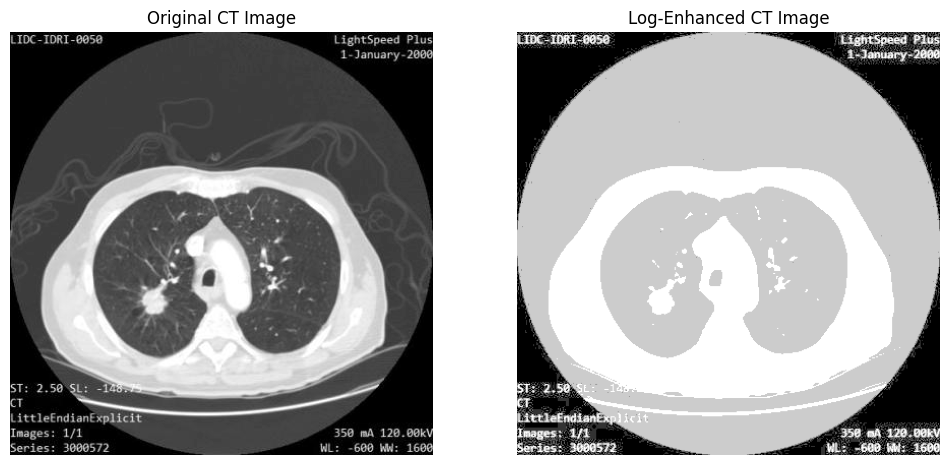

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/CT Image'

if os.path.exists(image_directory) and os.path.isdir(image_directory):
    image_files = [os.path.join(image_directory, file) for file in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, file))]

    enhanced_directory = os.path.join(image_directory, 'log_enhanced_images')
    os.makedirs(enhanced_directory, exist_ok=True)

    for image_path in image_files:
        ct_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if ct_image is None:
            print(f"Error: Unable to load the image from {image_path}")
        else:
            log_transformed_image = np.log1p(ct_image).astype(np.uint8)
            log_normalized_image = cv2.normalize(log_transformed_image, None, 0, 255, cv2.NORM_MINMAX)

            filename = os.path.basename(image_path)
            enhanced_image_path = os.path.join(enhanced_directory, f'log_enhanced_{filename}')
            cv2.imwrite(enhanced_image_path, log_normalized_image)

            plt.figure(figsize=(12, 6))
            plt.subplot(121)
            plt.imshow(ct_image, cmap='gray')
            plt.title('Original CT Image')
            plt.axis('off')

            plt.subplot(122)
            plt.imshow(log_normalized_image, cmap='gray')
            plt.title('Log-Enhanced CT Image')
            plt.axis('off')

            plt.show()

else:
    print(f"Error: Image directory not found. Please check the directory path.")